In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df = pd.read_csv("datasets/created/new_model.csv")
df

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_weight_goals,away_weight_goals_suf,home_weight_goals_l5,away_weight_goals_suf_l5,home_weight_points,away_weight_points,away_weight_goals,home_weight_goals_suf,away_weight_goals_l5,home_weight_goals_suf_l5
0,2018-03-27,United States,Paraguay,25.0,30.0,1,0,0,-5.0,1.0,...,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0
1,2018-05-28,United States,Bolivia,24.0,57.0,3,0,0,-33.0,0.0,...,-33.000000,-0.000000,-33.0,-0.0,-99.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0
2,2018-06-22,Brazil,Costa Rica,2.0,23.0,2,0,0,-21.0,0.0,...,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0
3,2018-07-02,Brazil,Mexico,4.0,10.0,2,0,0,-6.0,1.0,...,-12.000000,-0.000000,-12.0,-0.0,-18.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0
4,2018-09-07,Ecuador,Jamaica,60.0,54.0,2,0,0,6.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2024-06-11,Chile,Paraguay,42.0,56.0,3,0,0,-14.0,2.0,...,-12.444444,-17.150000,-5.6,-5.6,-14.622222,-11.900000,-9.450000,-18.666667,-2.8,-11.2
347,2024-06-12,Ecuador,Bolivia,31.0,86.0,3,1,0,-55.0,-1.0,...,-71.382979,-126.097561,-33.0,-77.0,-80.744681,-25.487805,-46.951220,-64.361702,-33.0,-22.0
348,2024-06-12,United States,Brazil,13.0,5.0,1,1,2,8.0,1.0,...,12.333333,4.000000,14.4,12.8,14.500000,17.739130,15.130435,7.666667,8.0,14.4
349,2024-06-15,Colombia,Bolivia,14.0,86.0,3,0,0,-72.0,0.0,...,-97.920000,-166.285714,-158.4,-115.2,-128.160000,-32.571429,-61.714286,-57.600000,-43.2,-57.6


In [56]:
possible_features = ["rank_home", "rank_away"] + df.columns[8:25].tolist() + df.columns[37:-2].tolist()
possible_features

['rank_home',
 'rank_away',
 'rank_dif',
 'rank_change_home',
 'rank_change_away',
 'home_goals_mean',
 'home_goals_mean_l5',
 'home_goals_suf_mean',
 'home_goals_suf_mean_l5',
 'home_rank_mean',
 'home_rank_mean_l5',
 'home_points_mean',
 'home_points_mean_l5',
 'away_goals_mean',
 'away_goals_mean_l5',
 'away_goals_suf_mean',
 'away_goals_suf_mean_l5',
 'away_rank_mean',
 'away_rank_mean_l5',
 'total_games_away',
 'total_games_home',
 'home_weight_goals',
 'away_weight_goals_suf',
 'home_weight_goals_l5',
 'away_weight_goals_suf_l5',
 'home_weight_points',
 'away_weight_points',
 'away_weight_goals',
 'home_weight_goals_suf']

In [57]:
df['total_games_home'] = df.apply(lambda x: len(df[(df.home_team == x["home_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["home_team"]) & (df.date < x["date"])]), axis=1)


In [58]:
df['total_games_away'] = df.apply(lambda x: len(df[(df.home_team == x["away_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["away_team"]) & (df.date < x["date"])]), axis=1)


In [59]:
df_model = df[(df.total_games_home > 5) & (df.total_games_away > 5)]
df_model


,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_weight_goals,away_weight_goals_suf,home_weight_goals_l5,away_weight_goals_suf_l5,home_weight_points,away_weight_points,away_weight_goals,home_weight_goals_suf,away_weight_goals_l5,home_weight_goals_suf_l5
45,2019-06-15,Venezuela,Peru,33.0,21.0,0,0,2,12.0,4.0,...,22.000000,15.428571,24.0,19.2,20.000000,17.142857,13.714286,14.000000,9.6,12.0
49,2019-06-18,Brazil,Venezuela,3.0,33.0,0,0,2,-30.0,0.0,...,-51.428571,-30.000000,-48.0,-30.0,-81.428571,-47.142857,-47.142857,-4.285714,-48.0,-6.0
54,2019-06-22,Brazil,Peru,3.0,21.0,5,0,0,-18.0,0.0,...,-27.000000,-20.000000,-21.6,-14.4,-45.000000,-28.000000,-22.000000,-2.250000,-18.0,-3.6
57,2019-06-26,United States,Panama,30.0,75.0,1,0,0,-45.0,6.0,...,-56.250000,-105.000000,-36.0,-108.0,-75.000000,-7.500000,-15.000000,-45.000000,-18.0,-45.0
59,2019-06-28,Colombia,Chile,13.0,16.0,0,0,2,-3.0,1.0,...,-6.750000,-5.142857,-7.2,-5.4,-8.250000,-3.000000,-3.000000,-1.500000,-3.6,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2024-06-11,Chile,Paraguay,42.0,56.0,3,0,0,-14.0,2.0,...,-12.444444,-17.150000,-5.6,-5.6,-14.622222,-11.900000,-9.450000,-18.666667,-2.8,-11.2
347,2024-06-12,Ecuador,Bolivia,31.0,86.0,3,1,0,-55.0,-1.0,...,-71.382979,-126.097561,-33.0,-77.0,-80.744681,-25.487805,-46.951220,-64.361702,-33.0,-22.0
348,2024-06-12,United States,Brazil,13.0,5.0,1,1,2,8.0,1.0,...,12.333333,4.000000,14.4,12.8,14.500000,17.739130,15.130435,7.666667,8.0,14.4
349,2024-06-15,Colombia,Bolivia,14.0,86.0,3,0,0,-72.0,0.0,...,-97.920000,-166.285714,-158.4,-115.2,-128.160000,-32.571429,-61.714286,-57.600000,-43.2,-57.6


# Home Team

In [60]:
target = 'home_score'
df_feats = df_model[[target] + possible_features]
df_feats

,home_score,rank_home,rank_away,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,...,total_games_away,total_games_home,home_weight_goals,away_weight_goals_suf,home_weight_goals_l5,away_weight_goals_suf_l5,home_weight_points,away_weight_points,away_weight_goals,home_weight_goals_suf
45,0,33.0,21.0,12.0,4.0,0.0,1.833333,2.0,1.166667,1.0,...,7,6,22.000000,15.428571,24.0,19.2,20.000000,17.142857,13.714286,14.000000
49,0,3.0,33.0,-30.0,0.0,4.0,1.714286,1.6,0.142857,0.2,...,7,7,-51.428571,-30.000000,-48.0,-30.0,-81.428571,-47.142857,-47.142857,-4.285714
54,5,3.0,21.0,-18.0,0.0,0.0,1.500000,1.2,0.125000,0.2,...,9,8,-27.000000,-20.000000,-21.6,-14.4,-45.000000,-28.000000,-22.000000,-2.250000
57,1,30.0,75.0,-45.0,6.0,1.0,1.250000,0.8,1.000000,1.0,...,6,12,-56.250000,-105.000000,-36.0,-108.0,-75.000000,-7.500000,-15.000000,-45.000000
59,0,13.0,16.0,-3.0,1.0,1.0,2.250000,2.4,0.500000,0.2,...,7,8,-6.750000,-5.142857,-7.2,-5.4,-8.250000,-3.000000,-3.000000,-1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,3,42.0,56.0,-14.0,2.0,3.0,0.888889,0.4,1.333333,0.8,...,40,45,-12.444444,-17.150000,-5.6,-5.6,-14.622222,-11.900000,-9.450000,-18.666667
347,3,31.0,86.0,-55.0,-1.0,1.0,1.297872,0.6,1.170213,0.4,...,41,47,-71.382979,-126.097561,-33.0,-77.0,-80.744681,-25.487805,-46.951220,-64.361702
348,1,13.0,5.0,8.0,1.0,0.0,1.541667,1.8,0.958333,1.8,...,46,48,12.333333,4.000000,14.4,12.8,14.500000,17.739130,15.130435,7.666667
349,3,14.0,86.0,-72.0,0.0,1.0,1.360000,2.2,0.800000,0.8,...,42,50,-97.920000,-166.285714,-158.4,-115.2,-128.160000,-32.571429,-61.714286,-57.600000


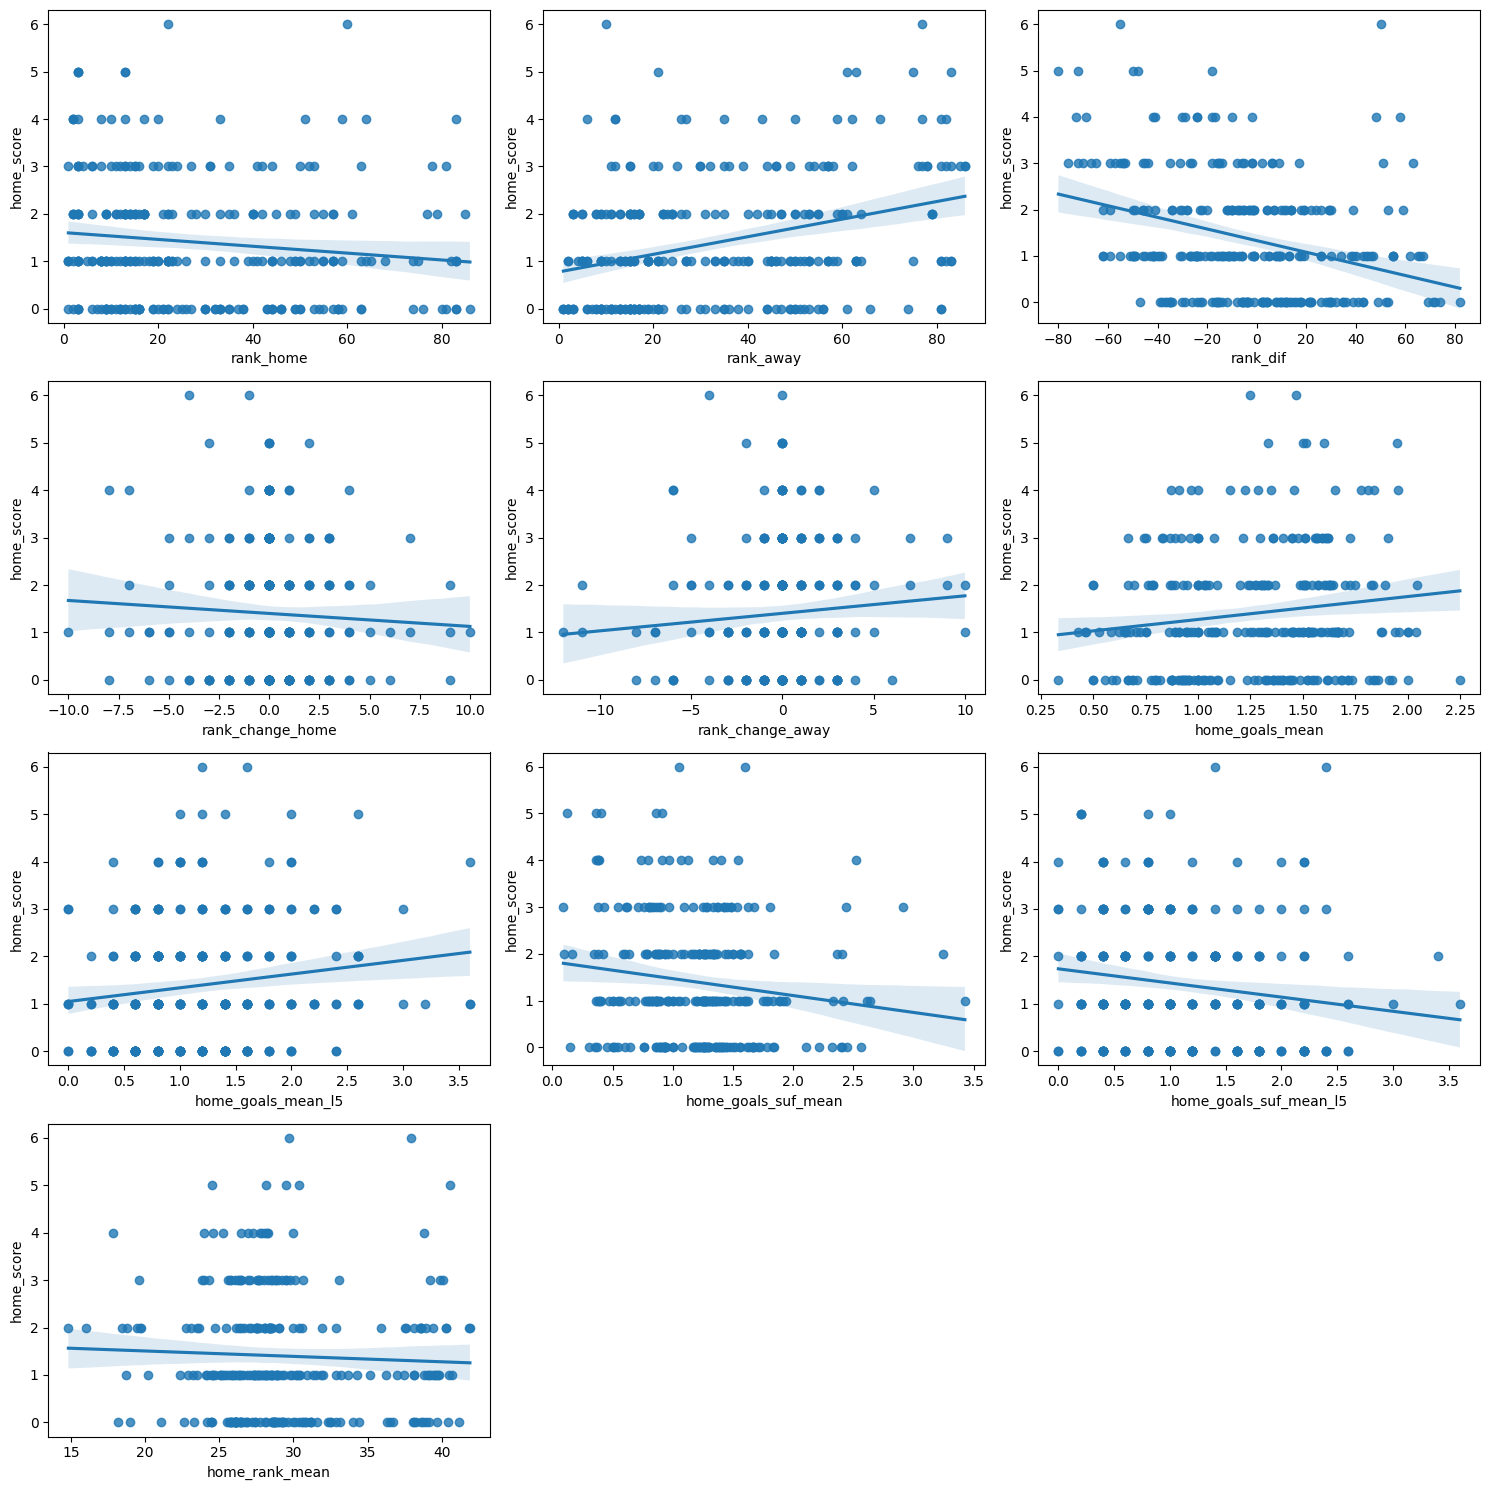

In [61]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[:10]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

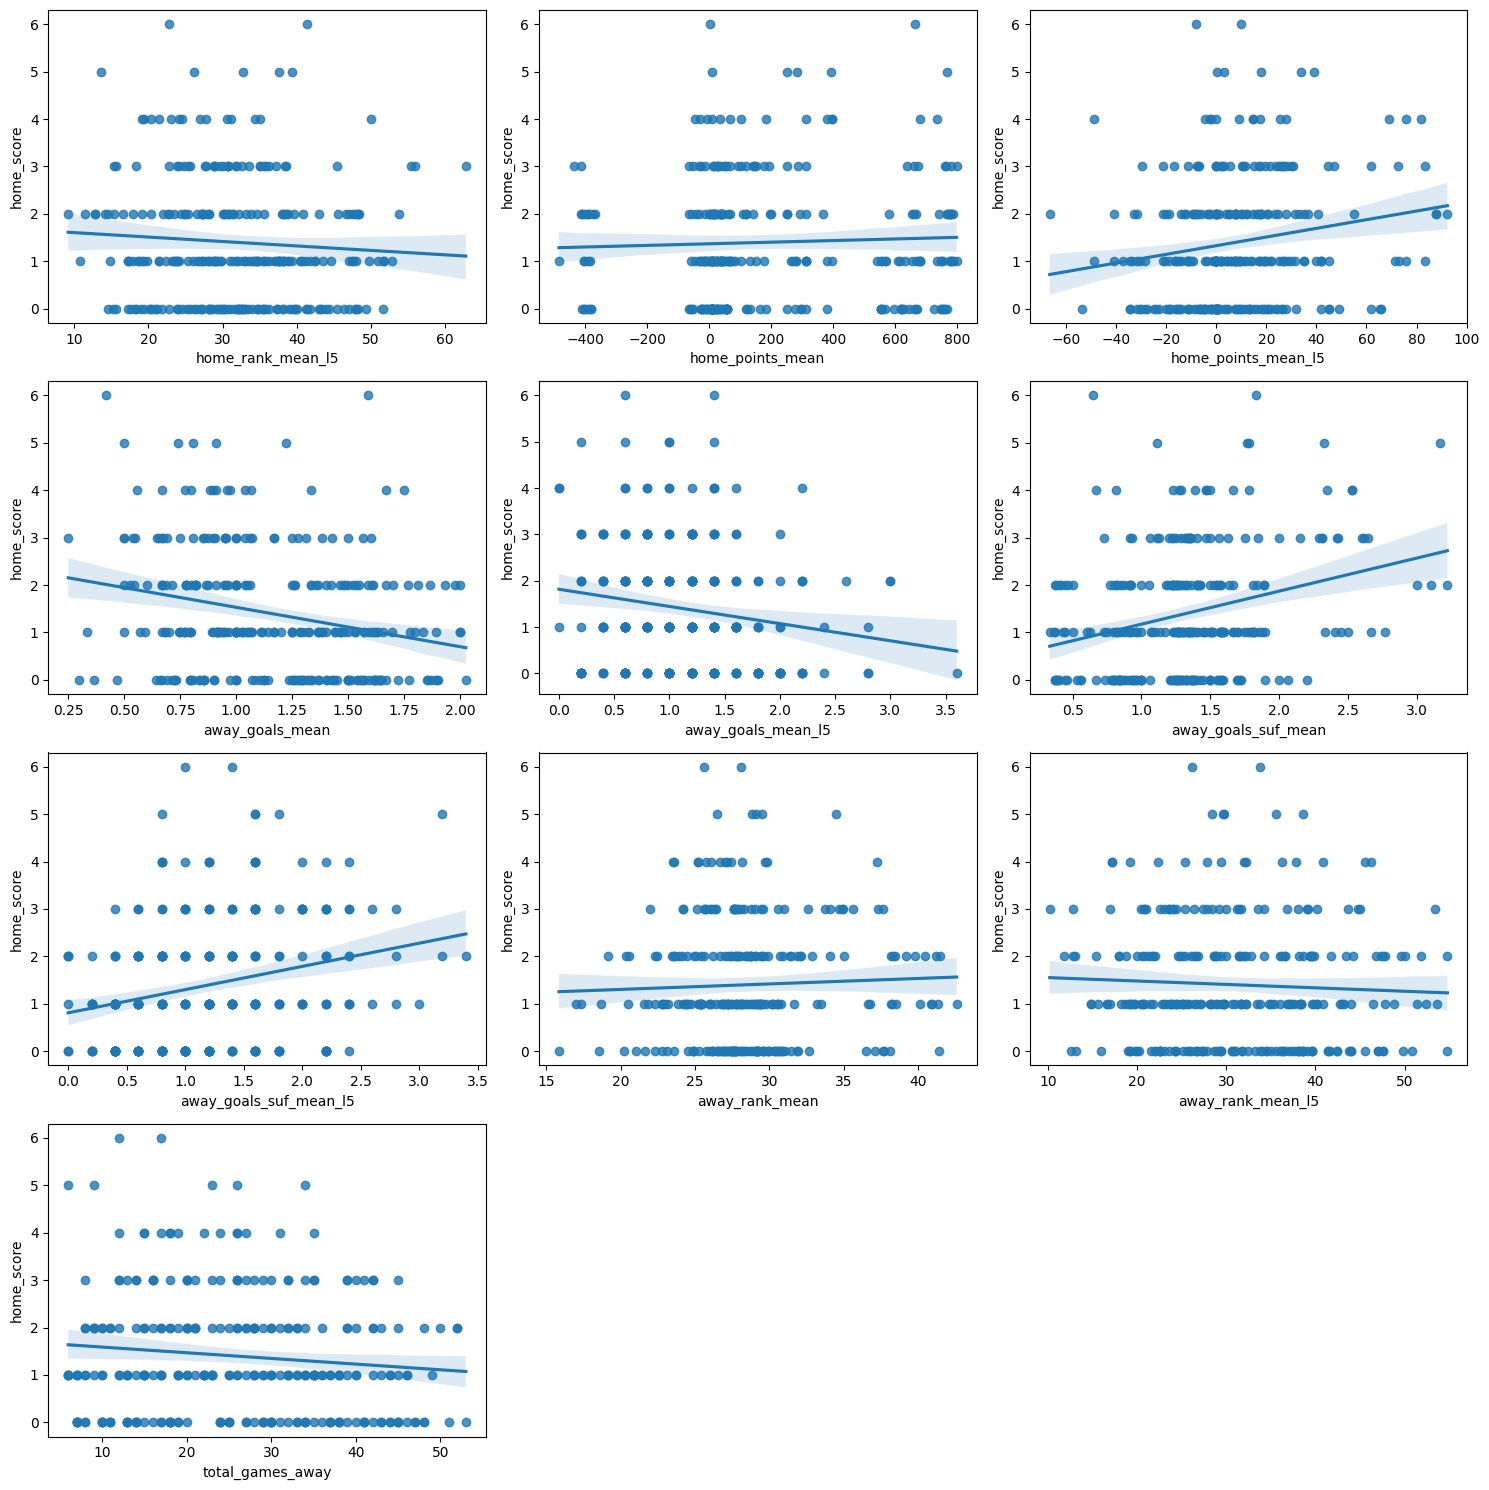

In [62]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[10:20])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[10:20]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

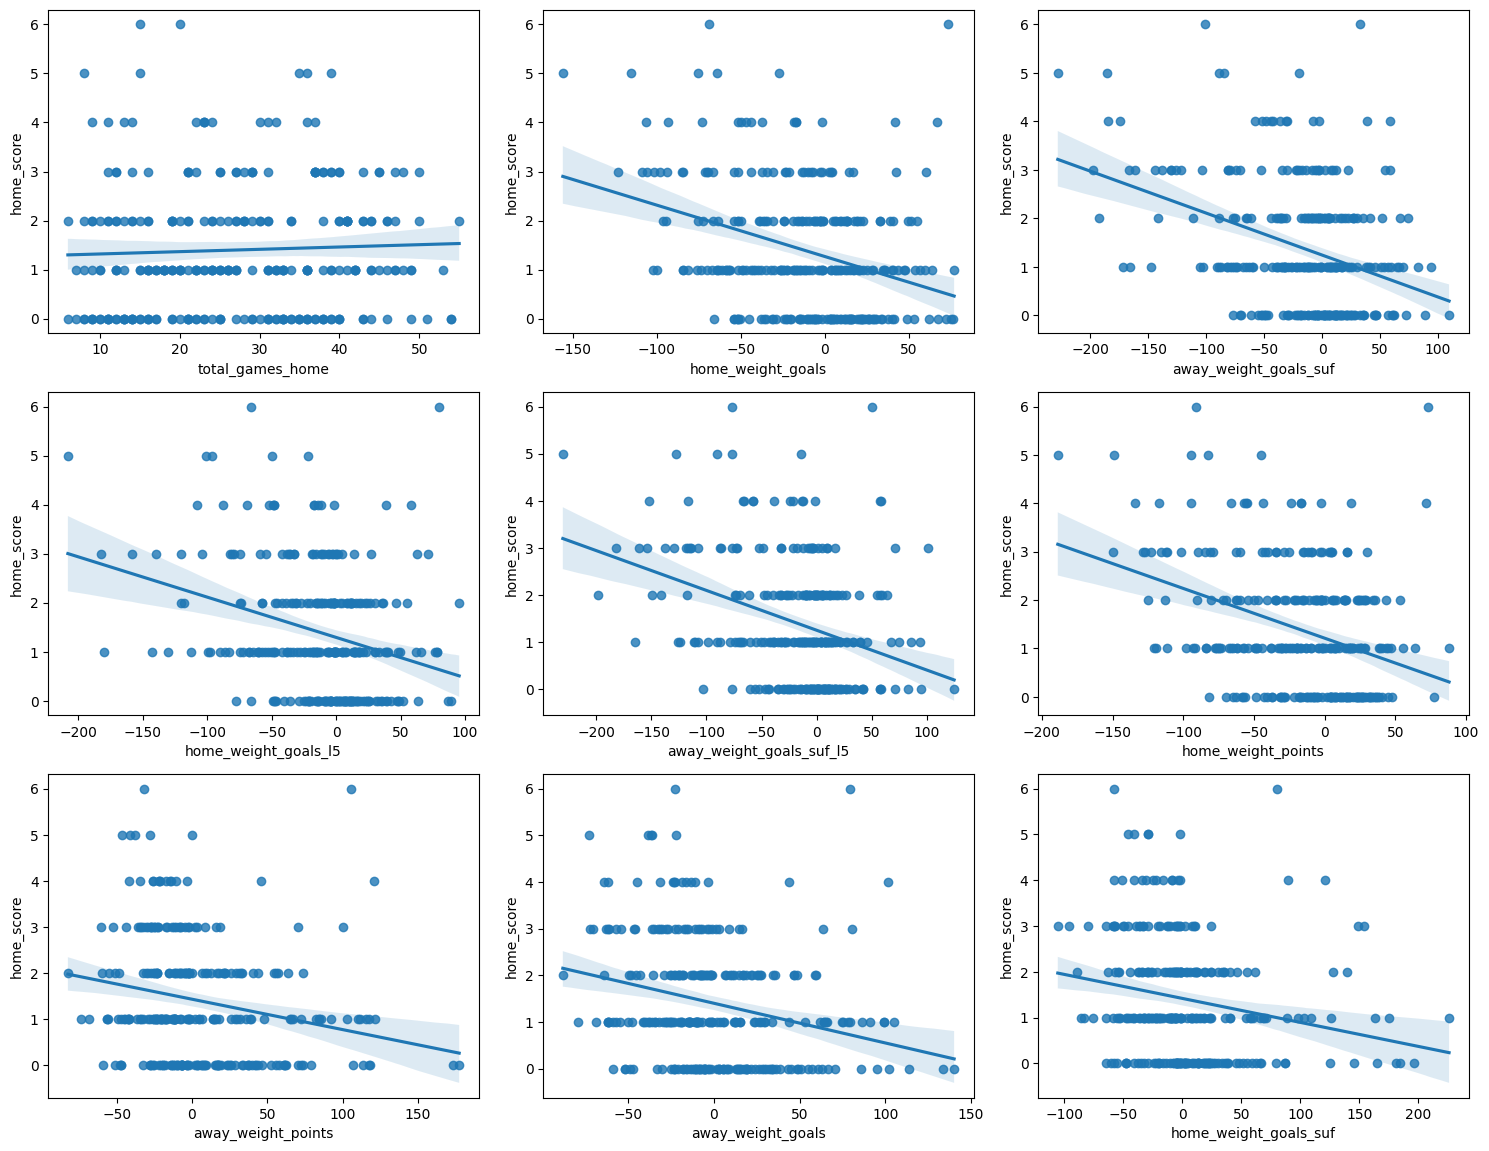

In [63]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[20:])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[20:]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

                     feature     slope  abs_slope
13           away_goals_mean -0.831011   0.831011
15       away_goals_suf_mean  0.697213   0.697213
16    away_goals_suf_mean_l5  0.489421   0.489421
5            home_goals_mean  0.482493   0.482493
14        away_goals_mean_l5 -0.370597   0.370597
7        home_goals_suf_mean -0.360977   0.360977
8     home_goals_suf_mean_l5 -0.298572   0.298572
6         home_goals_mean_l5  0.289338   0.289338
4           rank_change_away  0.036970   0.036970
3           rank_change_home -0.027391   0.027391
1                  rank_away  0.018564   0.018564
2                   rank_dif -0.012544   0.012544
19          total_games_away -0.011990   0.011990
17            away_rank_mean  0.011571   0.011571
9             home_rank_mean -0.011412   0.011412
21         home_weight_goals -0.010476   0.010476
25        home_weight_points -0.010283   0.010283
10         home_rank_mean_l5 -0.009381   0.009381
12       home_points_mean_l5  0.009133   0.009133


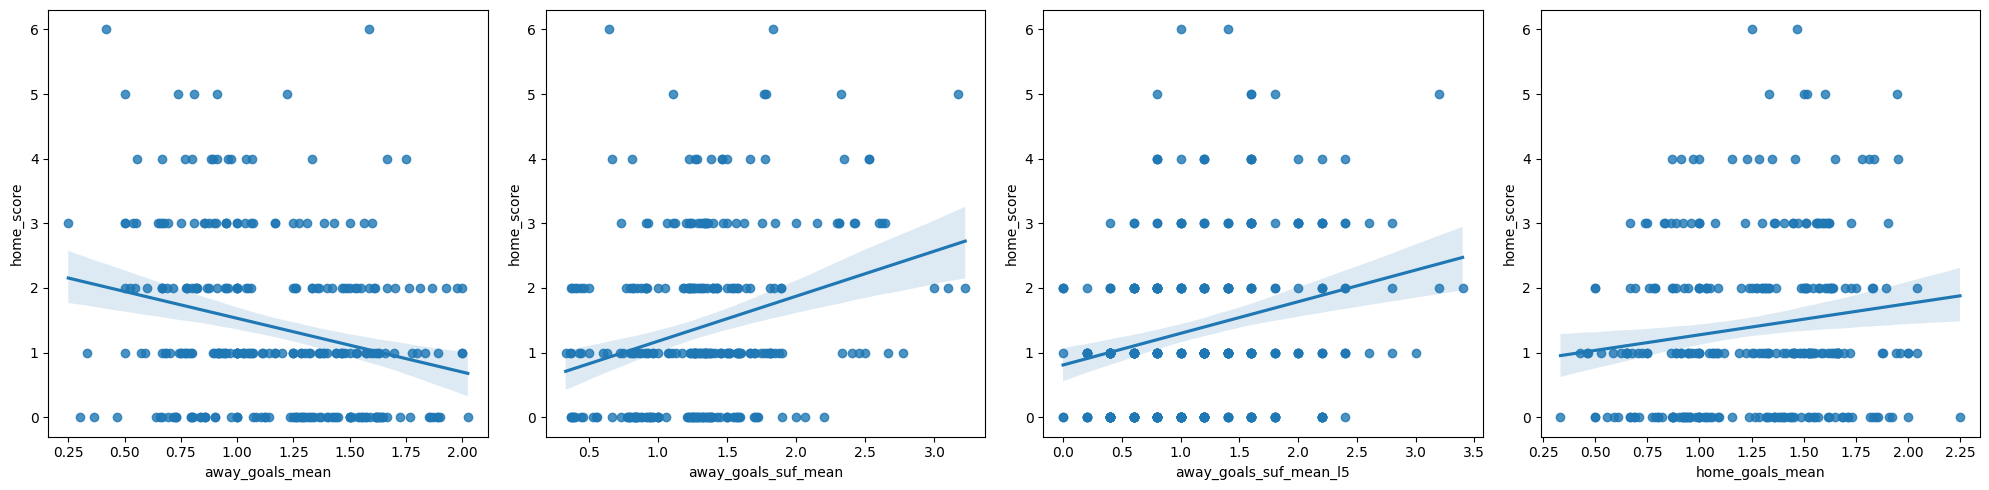

In [64]:
from sklearn.linear_model import LinearRegression


slopes = []

for feature in possible_features:
    X = df_feats[[feature]].values.reshape(-1, 1)
    y = df_feats[target].values
    reg = LinearRegression().fit(X, y)
    slopes.append(reg.coef_[0])

slopes_df = pd.DataFrame({'feature': possible_features, 'slope': slopes})

slopes_df['abs_slope'] = slopes_df['slope'].abs()
slopes_df = slopes_df.sort_values(by='abs_slope', ascending=False)

selected_features = slopes_df['feature'].values[:4]  # Aquí seleccionamos las top 3 características

print(slopes_df)
print("Selected features:", selected_features)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, feature in enumerate(selected_features):
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[i])

plt.tight_layout()
plt.show()

In [65]:
selected_features = [['away_goals_mean'], ['away_goals_suf_mean'], ['away_goals_suf_mean_l5'], ['home_goals_mean']]

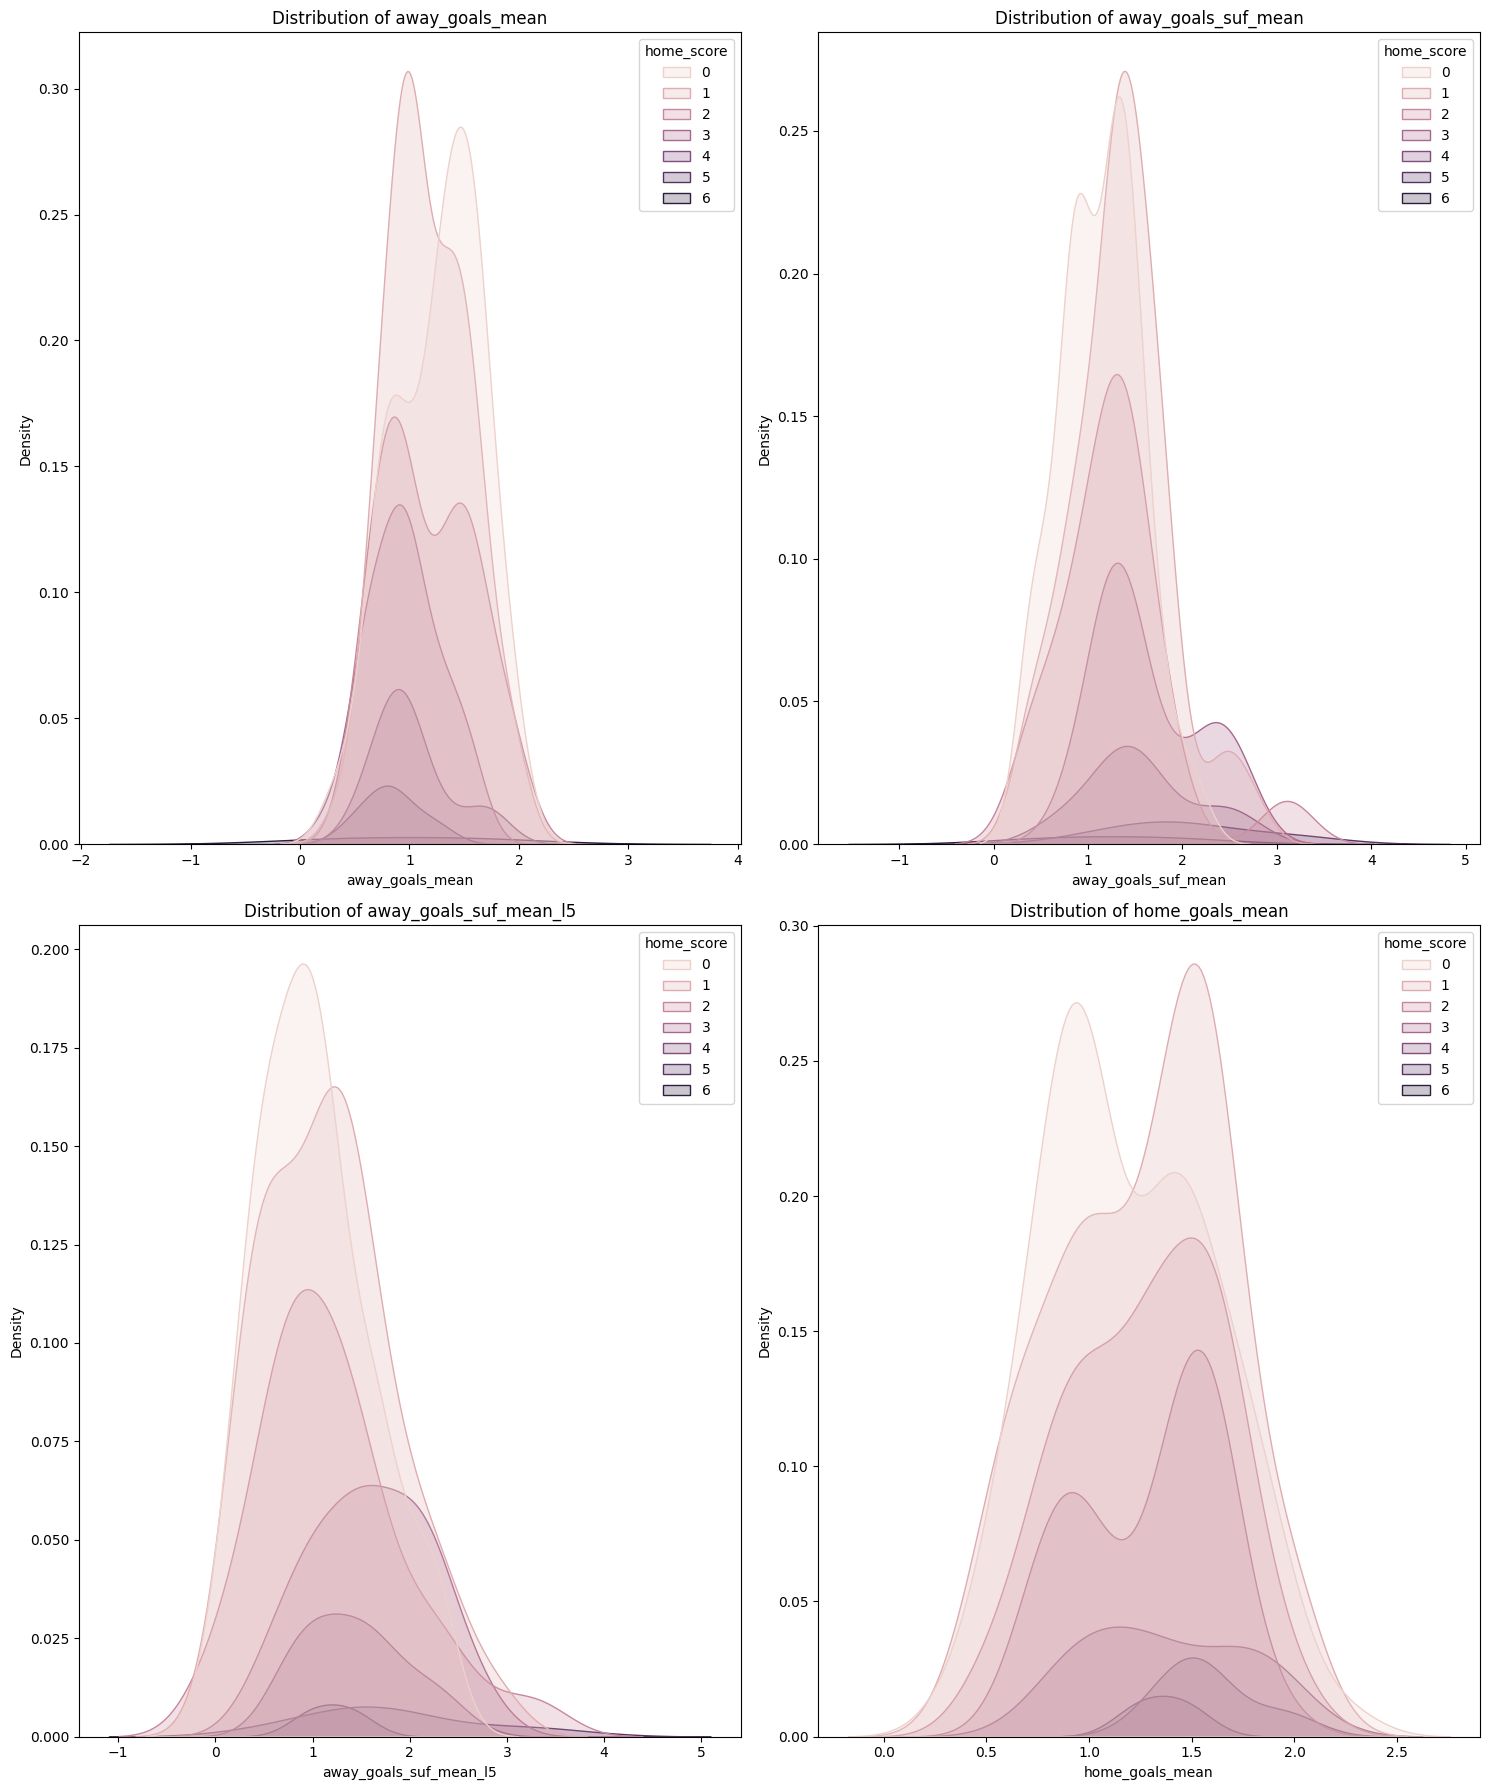

In [66]:
# Número de filas y columnas
num_cols = 2
num_rows = (len(selected_features) + num_cols - 1) // num_cols

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 18))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos de densidad para cada característica
for i, feature in enumerate(selected_features):
    sns.kdeplot(data=df_feats, x=feature[0], hue=target, fill=True, warn_singular=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature[0]}')

# Ocultar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [67]:

#create home_cols using this selected_features = [['away_goals_suf_mean'], ['away_goals_mean'], ['home_goals_mean'], ['home_goals_suf_mean']]
home_cols = ["away_goals_mean", "away_goals_suf_mean", 'away_goals_suf_mean_l5','home_goals_mean']
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

df_model[["home_score"]+home_cols].to_csv('./datasets/created/home_db.csv',index=False)



# Away Team

In [68]:
target = 'away_score'

In [69]:
df_feats = df_model[[target] + possible_features]

In [71]:
df_feats.columns

Index(['away_score', 'rank_home', 'rank_away', 'rank_dif', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'total_games_away', 'total_games_home', 'home_weight_goals',
       'away_weight_goals_suf', 'home_weight_goals_l5',
       'away_weight_goals_suf_l5', 'home_weight_points', 'away_weight_points',
       'away_weight_goals', 'home_weight_goals_suf'],
      dtype='object')

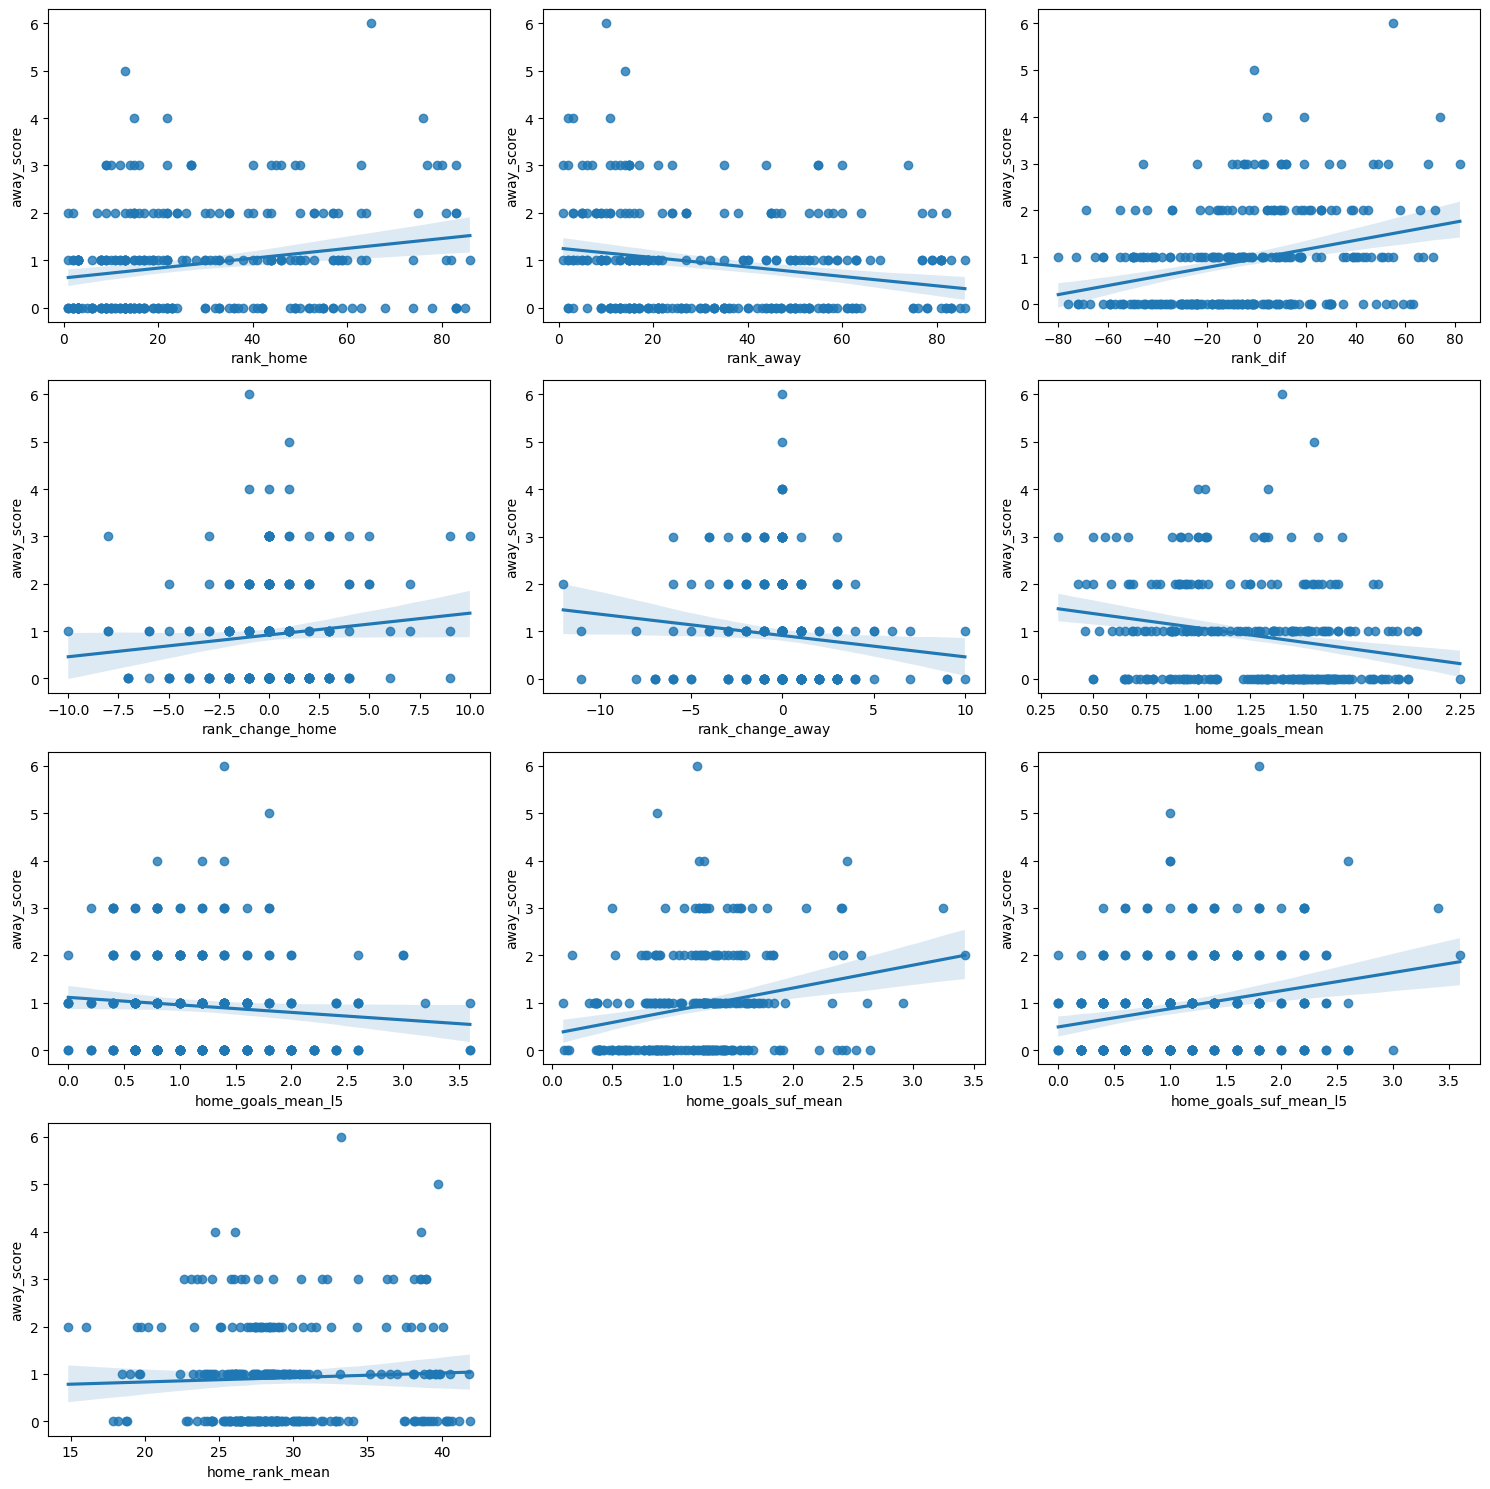

In [72]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[:10]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

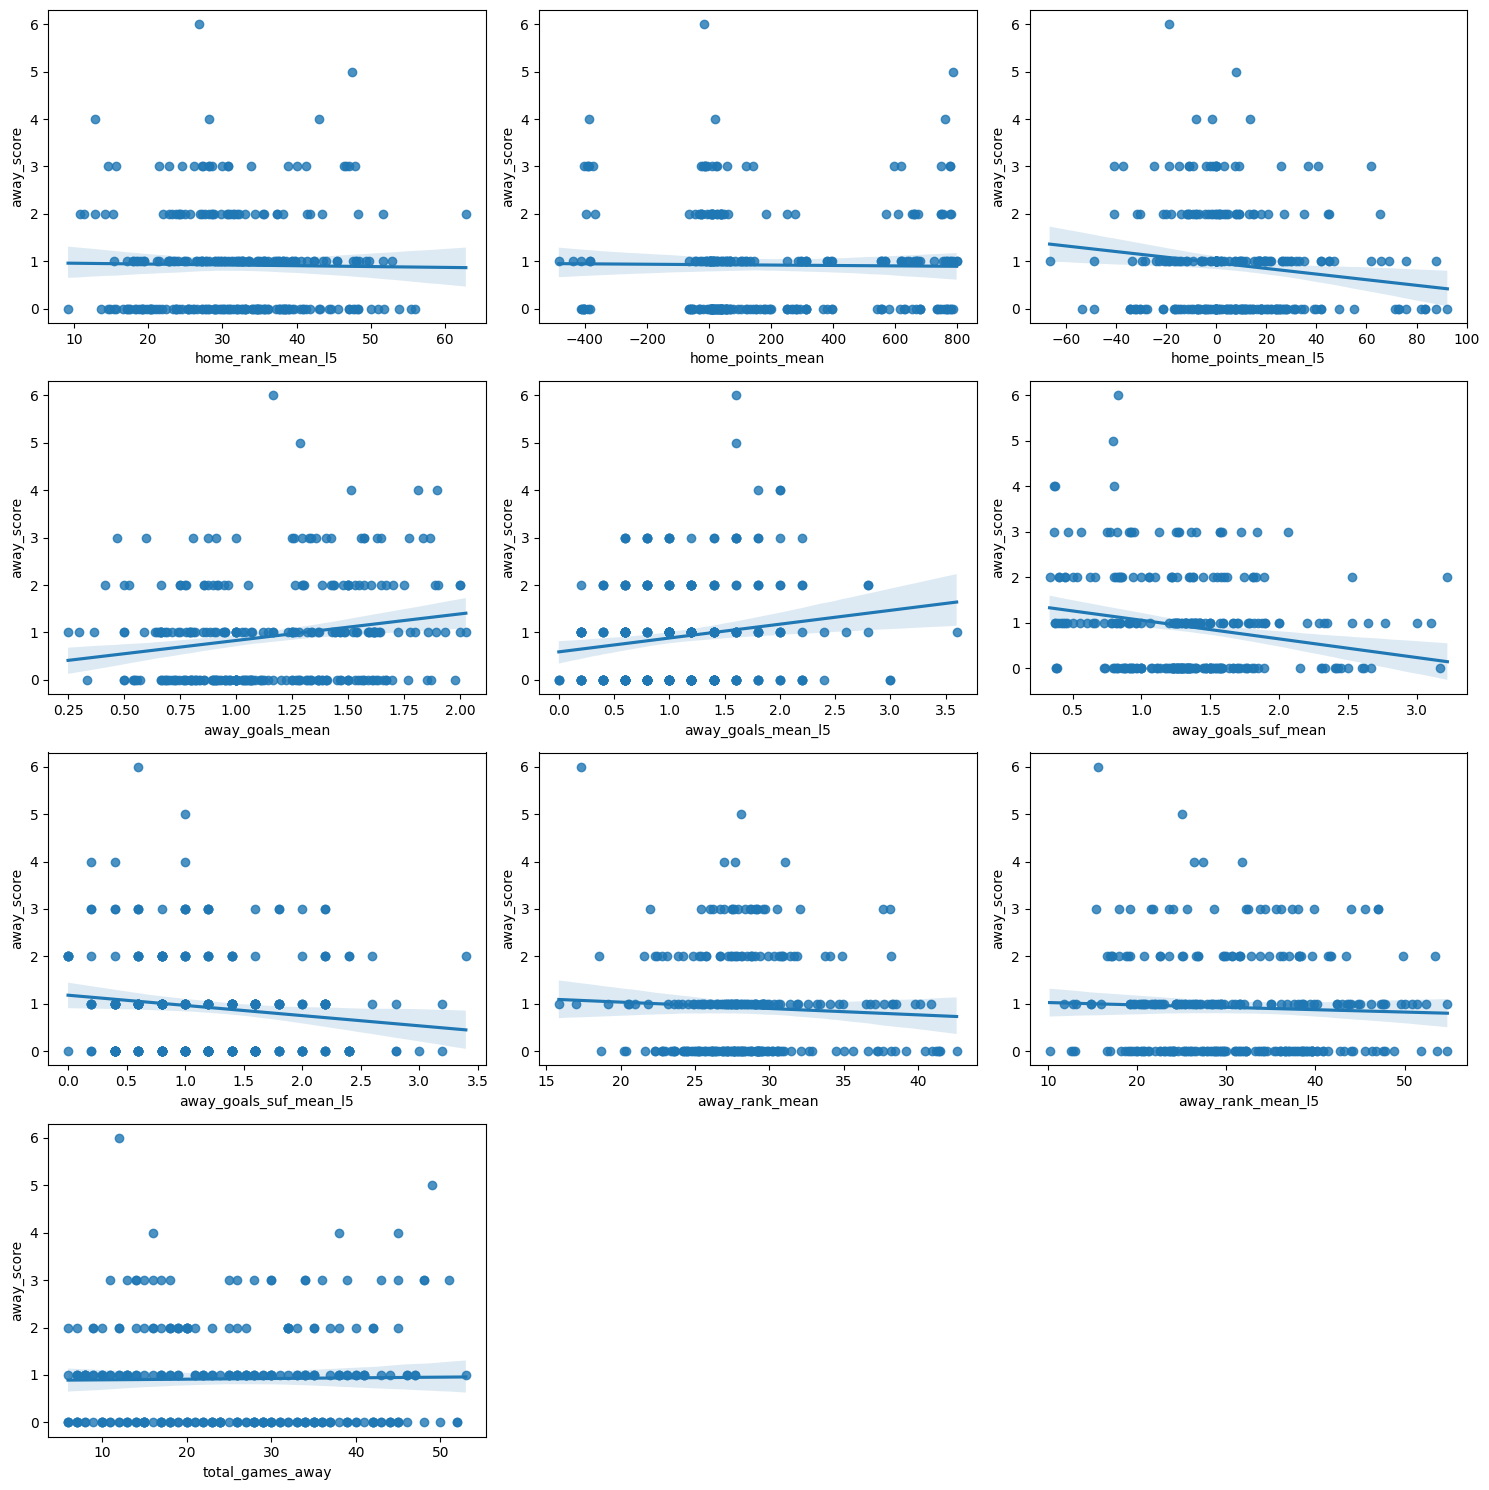

In [73]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[10:20]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

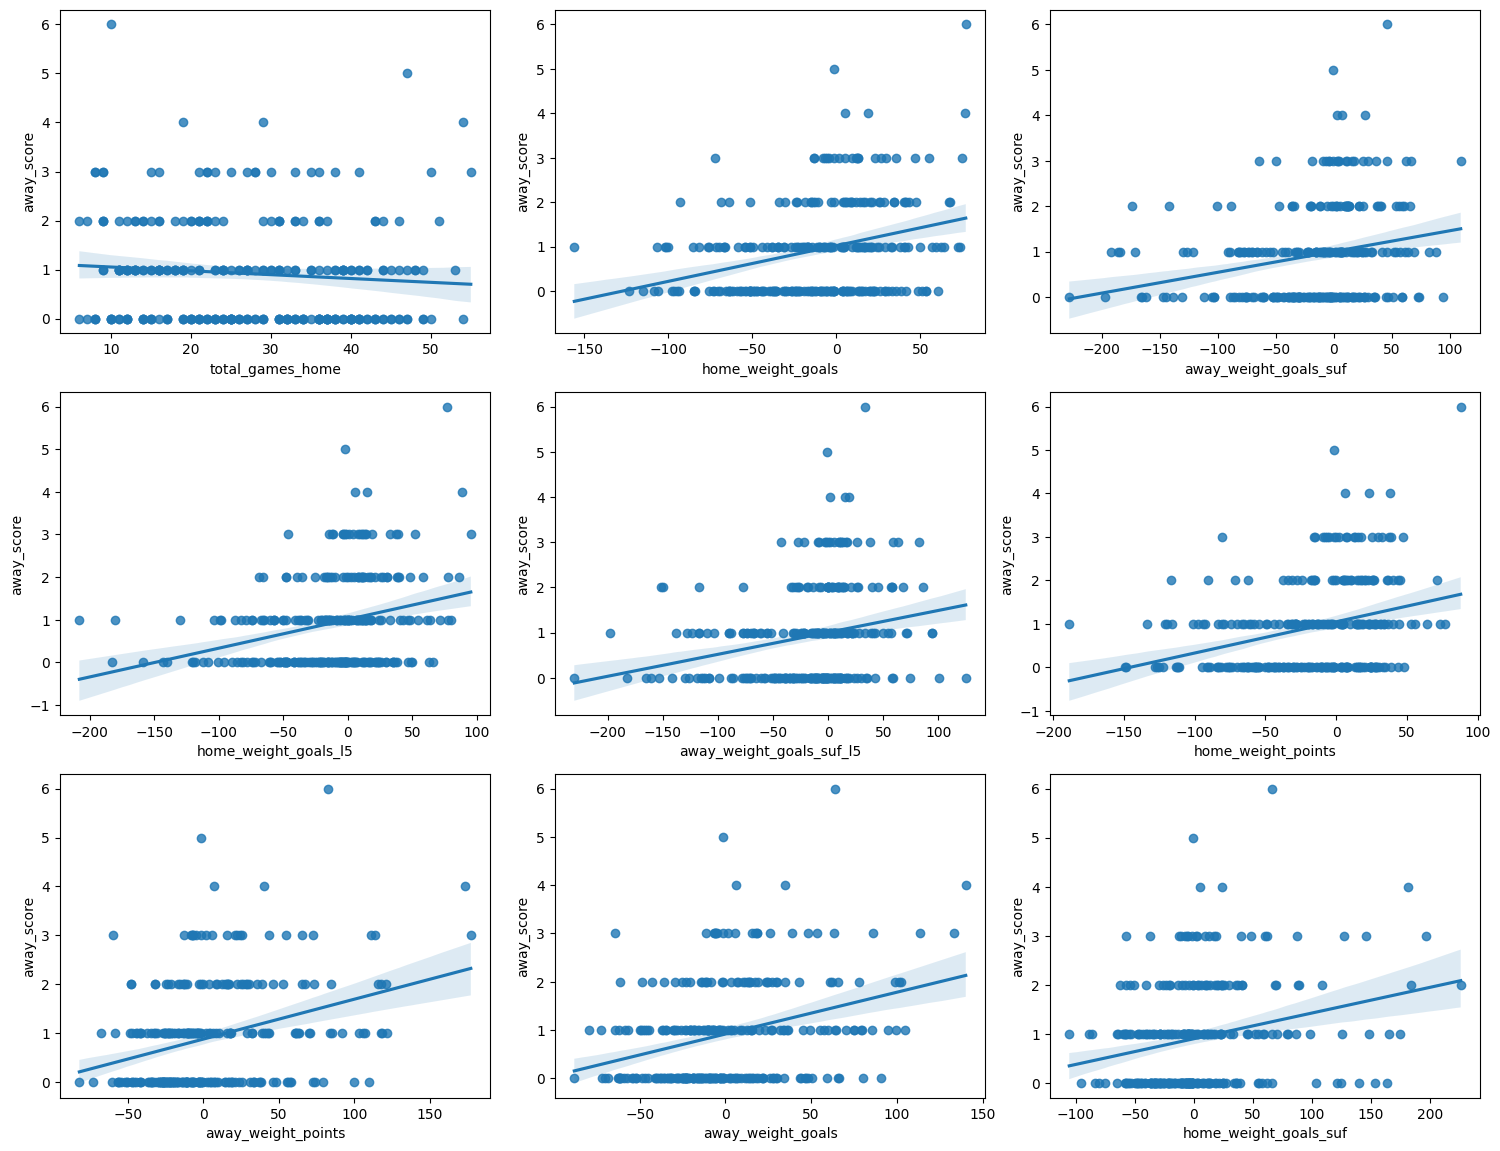

In [74]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[20:]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

                     feature     slope  abs_slope
5            home_goals_mean -0.603500   0.603500
13           away_goals_mean  0.560737   0.560737
7        home_goals_suf_mean  0.483936   0.483936
15       away_goals_suf_mean -0.410639   0.410639
8     home_goals_suf_mean_l5  0.382109   0.382109
14        away_goals_mean_l5  0.291992   0.291992
16    away_goals_suf_mean_l5 -0.215116   0.215116
6         home_goals_mean_l5 -0.158445   0.158445
3           rank_change_home  0.046083   0.046083
4           rank_change_away -0.045035   0.045035
17            away_rank_mean -0.013460   0.013460
0                  rank_home  0.010405   0.010405
1                  rank_away -0.009932   0.009932
2                   rank_dif  0.009674   0.009674
9             home_rank_mean  0.009457   0.009457
27         away_weight_goals  0.008655   0.008655
26        away_weight_points  0.008141   0.008141
21         home_weight_goals  0.008042   0.008042
20          total_games_home -0.007803   0.007803


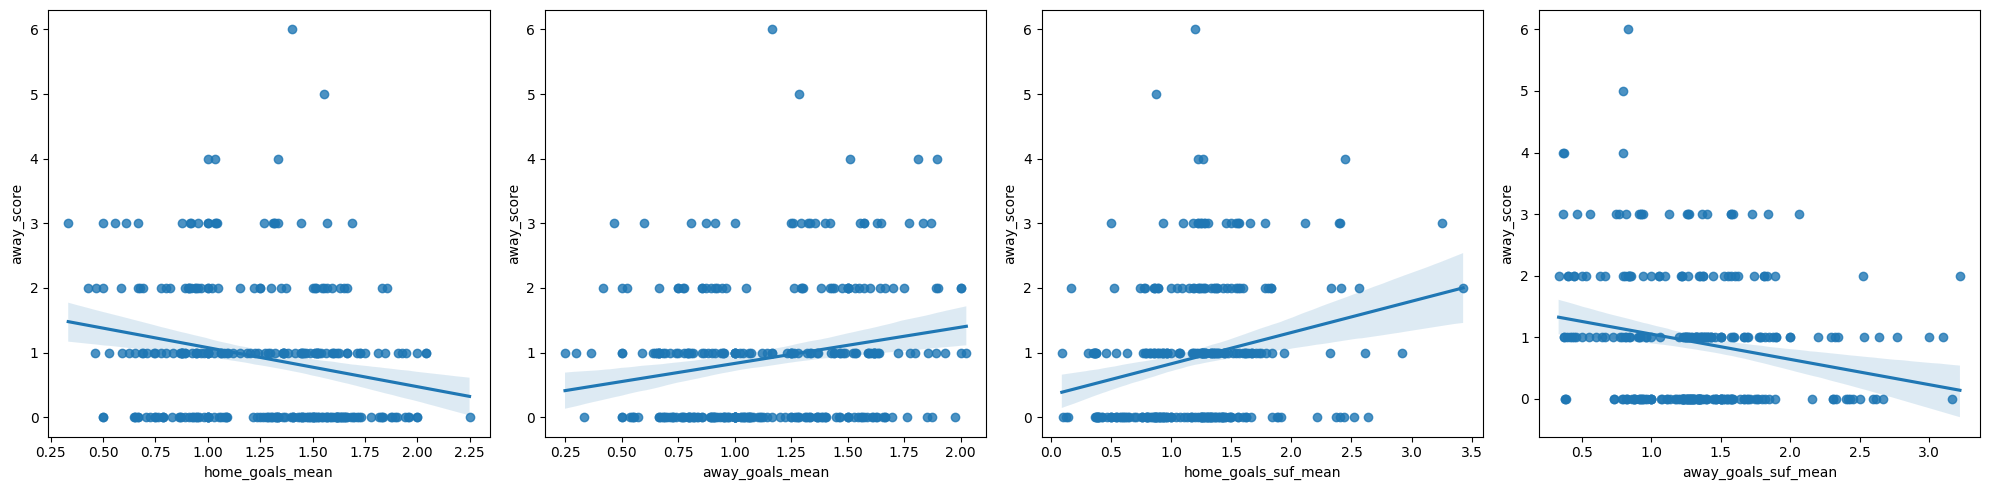

In [75]:
from sklearn.linear_model import LinearRegression


slopes = []

for feature in possible_features:
    X = df_feats[[feature]].values.reshape(-1, 1)
    y = df_feats[target].values
    reg = LinearRegression().fit(X, y)
    slopes.append(reg.coef_[0])

slopes_df = pd.DataFrame({'feature': possible_features, 'slope': slopes})

slopes_df['abs_slope'] = slopes_df['slope'].abs()
slopes_df = slopes_df.sort_values(by='abs_slope', ascending=False)

selected_features = slopes_df['feature'].values[:4]  # Aquí seleccionamos las top 3 características

print(slopes_df)
print("Selected features:", selected_features)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, feature in enumerate(selected_features):
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[i])

plt.tight_layout()
plt.show()

In [76]:
selected_features = [['home_goals_mean'],['away_goals_mean'], ['home_goals_suf_mean'], ['away_goals_suf_mean']]

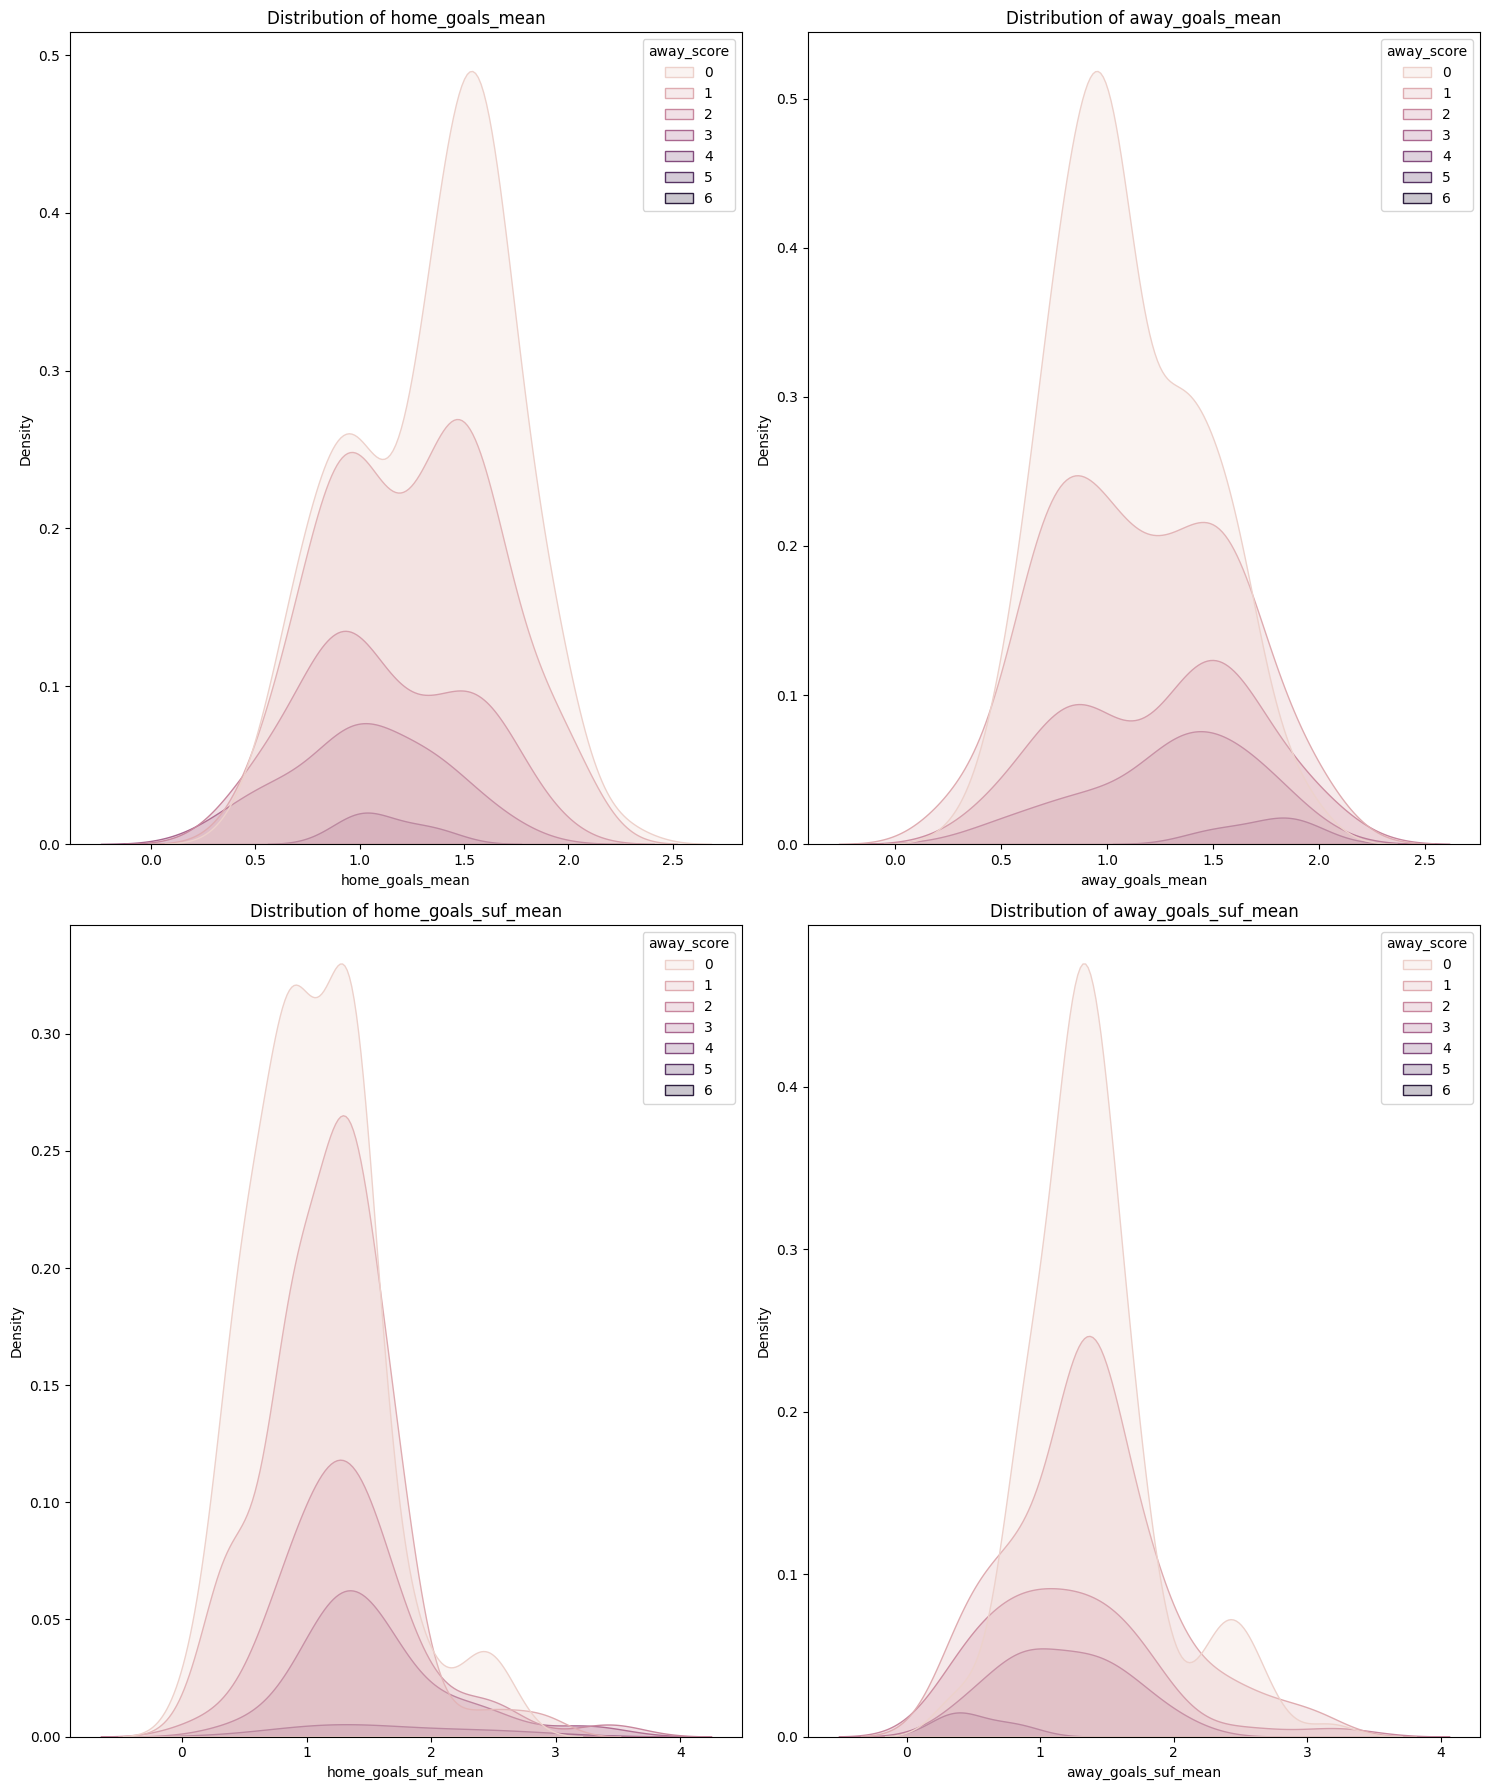

In [77]:
# Número de filas y columnas
num_cols = 2
num_rows = (len(selected_features) + num_cols - 1) // num_cols

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 18))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos de densidad para cada característica
for i, feature in enumerate(selected_features):
    sns.kdeplot(data=df_feats, x=feature[0], hue=target, fill=True, warn_singular=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature[0]}')

# Ocultar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [78]:

away_cols = ['home_goals_mean','away_goals_mean', 'home_goals_suf_mean', 'away_goals_suf_mean']
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

df_model[["away_score"]+away_cols].to_csv('./datasets/created/away_db.csv',index=False)

